In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Function to compute Rate of Convergence for an element and
# Plot the Strain Energy Error with Element Size
def mesh_conv(U, h, Uh):
    
    Uerr=np.abs(U-Uh)
    
    x=np.log(h)
    y=np.log(Uerr)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    Ufit=np.exp(intercept)*np.power(h,slope)
    beta=slope/2

    MCp=plt.loglog(h,Uerr,'ko',h,Ufit,'k--')
    plt.ylabel('Error in Mganetic Field [Tesla] (|B-Bh|)')
    plt.xlabel('Element size, mm (h)')
    plt.legend(MCp,['FEM','Regression Analysis'])

    return beta

In [3]:
mu = 6.3e-3
J0 = 10
ro = 3 
ri = 2
Uref = mu/ro * J0*(ro**2-ri**2)/2

In [4]:
# element size, number of elements, number of nodes, maximum magnetic field
# order 1 lagrange element
Data_1 = np.array([
    [0.1, 21160, 10422, 0.049498024236450625],
    [0.2, 5423, 2632, 0.049381439463679976],
    [0.4, 1515, 717, 0.047108188027292115],
    [0.8, 421, 190, 0.04259770225293415]])
Data=Data_1
h=Data[:,0] # Element Size
N=Data[:,1] # No. of Elements
n=Data[:,2] # No. of Nodes
Uh=Data[:,3] # Total Strain Energy
U=np.full_like(Uh,Uref)

In [5]:
p = 1 
m=1
s=1
beta_exp=min(p+1-s, 2*(p+1-m))

In [6]:
beta_exp

1

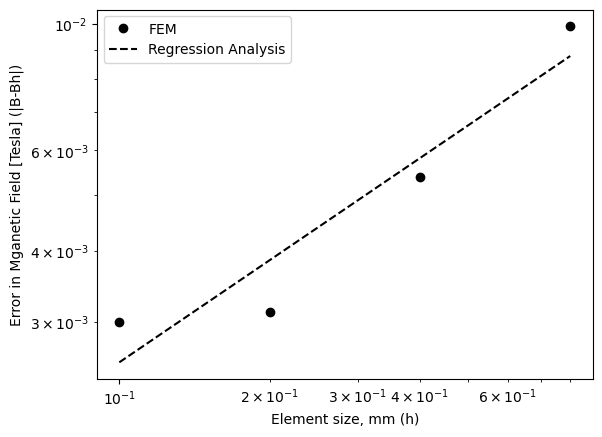

In [7]:
beta=mesh_conv(U, h, Uh)

In [8]:
print('Rate of Convergence from FEM simulations: ', beta)

Rate of Convergence from FEM simulations:  0.2977721461501682


In [9]:
print(np.abs(beta_exp-beta))

0.7022278538498318


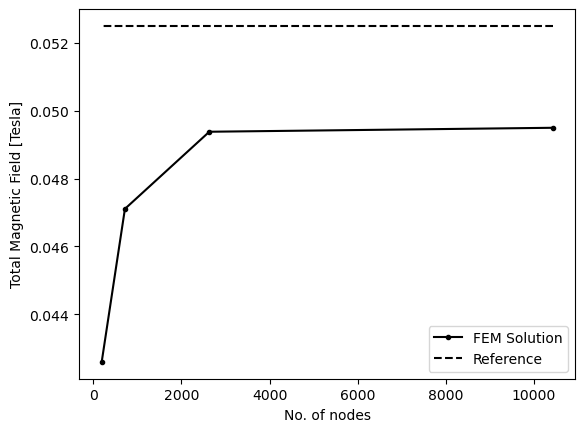

In [10]:
SENe=plt.plot(n,Uh,'k.-',n,U,'k--')
plt.xlabel('No. of nodes')
plt.ylabel('Total Magnetic Field [Tesla]')
plt.legend(SENe,['FEM Solution','Reference'])

In [11]:
# element size, number of elements, number of nodes, maximum magnetic field
# order 2 lagrange element
Data_2 = np.array([
    [0.1, 21166, 41382, 0.04959713017061045],
    [0.2, 5415, 10351, 0.049155350504166015],
    [0.4, 1519, 2794, 0.04636870443118161],
    [0.8, 421, 717, 0.04065335836072258]])
Data=Data_2
h=Data[:,0] # Element Size
N=Data[:,1] # No. of Elements
n=Data[:,2] # No. of Nodes
Uh=Data[:,3] # Total Strain Energy
U=np.full_like(Uh,Uref)

In [12]:
p = 2 
m=1
s=1
beta_exp=min(p+1-s, 2*(p+1-m))

In [13]:
beta_exp

2

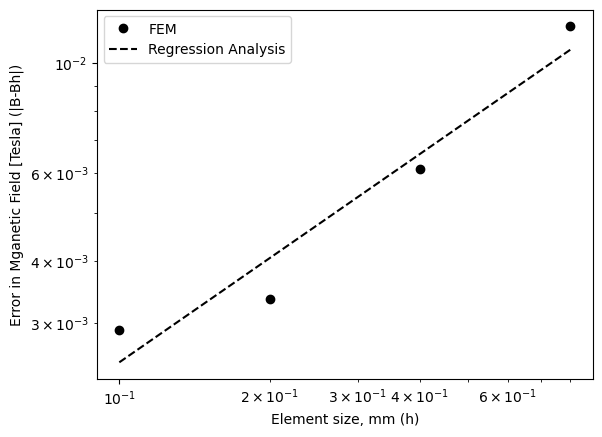

In [14]:
beta=mesh_conv(U, h, Uh)

In [15]:
print('Rate of Convergence from FEM simulations: ', beta)

Rate of Convergence from FEM simulations:  0.3480557982911515


In [16]:
print(np.abs(beta_exp-beta))

1.6519442017088486


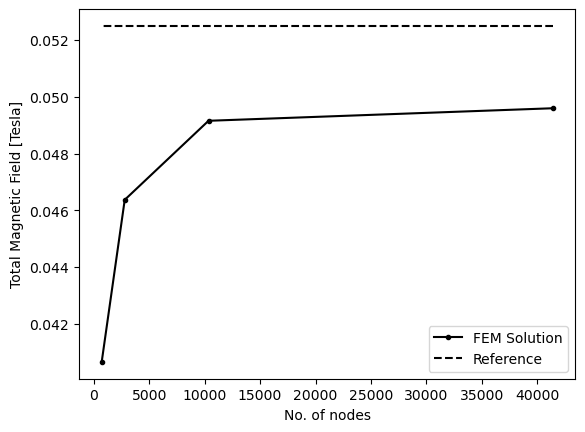

In [17]:
SENe=plt.plot(n,Uh,'k.-',n,U,'k--')
plt.xlabel('No. of nodes')
plt.ylabel('Total Magnetic Field [Tesla]')
plt.legend(SENe,['FEM Solution','Reference'])